# dependencies

## libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Data

In [2]:
# here we save the data in the df variable
df2 = pd.read_csv("/home/monky/Descargas/ciencia_datos/Corna_AR/Data_ar/Covid19Casos.csv", error_bad_lines = False)

In [3]:
#here we can see the data using ".head()"
df2.head(30)

id_evento_caso sexo  edad edad_años_meses residencia_pais_nombre  \
0          1000000    M  54.0            Años              Argentina   
1         10000000    F  52.0            Años              Argentina   
2         10000001    F  22.0            Años              Argentina   
3         10000002    F  44.0            Años              Argentina   
4         10000003    F  34.0            Años              Argentina   
5         10000004    F  32.0            Años              Argentina   
6         10000005    F  38.0            Años              Argentina   
7         10000006    M  57.0            Años              Argentina   
8         10000007    M  26.0            Años              Argentina   
9         10000008    M  25.0            Años              Argentina   
10        10000009    F  31.0            Años              Argentina   
11        10000010    F  59.0            Años              Argentina   
12        10000011    F  48.0            Años              Argentina   
13        10000012    F  31.0            Años              Argentina   
14        10000013    M  61.0            Años              Argentina   
15        10000014    M  41.0            Años              Argentina   
16        10000015    F  48.0            Años              Argentina   
17        10000016    F  37.0            Años              Argentina   
18        10000017    M  57.0            Años              Argentina   
19        10000018    M  34.0            Años              Argentina   
20         1000002    M  22.0            Años              Argentina   
21        10000020    M  22.0            Años              Argentina   
22        10000021    F  52.0            Años              Argentina   
23        10000022    F  42.0            Años              Argentina   
24        10000023    M  35.0            Años              Argentina   
25        10000024    M  40.0            Años              Argentina   
26        10000025    F  26.0            Años              Argentina   
27        10000026    F  24.0            Años              Argentina   
28        10000027    F  22.0            Años              Argentina   
29        10000028    F  41.0            Años              Argentina   

   residencia_provincia_nombre residencia_departamento_nombre  \
0                         CABA                SIN ESPECIFICAR   
1                         CABA                SIN ESPECIFICAR   
2                 Buenos Aires                Lomas de Zamora   
3                 Buenos Aires                     La Matanza   
4                         CABA                      COMUNA 01   
5                         CABA                      COMUNA 08   
6                         CABA                      COMUNA 12   
7                 Buenos Aires                          Junín   
8                 Buenos Aires                Lomas de Zamora   
9                 Buenos Aires             Esteban Echeverría   
10                Buenos Aires                  Vicente López   
11                        CABA                      COMUNA 02   
12                Buenos Aires                          Lanús   
13                Buenos Aires                     Hurlingham   
14                    Santa Fe                        Rosario   
15                        CABA                      COMUNA 07   
16                  Entre Ríos                         Nogoyá   
17                        CABA                      COMUNA 14   
18            Tierra del Fuego                        Ushuaia   
19                        CABA                      COMUNA 02   
20                Buenos Aires                     La Matanza   
21                        CABA                SIN ESPECIFICAR   
22                     Córdoba                        Capital   
23                        CABA                      COMUNA 15   
24                Buenos Aires                Tres de Febrero   
25                        CABA                SIN ESPECIFICAR   
26              

## Clear the Data

In [4]:
#Here we can see that we have wrong data (because there was no covit in Argentina before 2020)
df2[df2["fecha_diagnostico"]<="2020"]

id_evento_caso sexo  edad edad_años_meses residencia_pais_nombre  \
678301          10655005    F  26.0            Años              Argentina   
1691554         11630477    F  30.0            Años              Argentina   
2201576         12122746    M  27.0            Años              Argentina   
2354340         12271939    M  27.0            Años              Argentina   
3471455          1333926    F  17.0            Años              Argentina   
3575894         13439700    F  25.0            Años              Argentina   
3984116          1383222    F  51.0            Años        SIN ESPECIFICAR   
4530792         14359455    F  30.0            Años              Argentina   
4736069         14558009    F  38.0            Años        SIN ESPECIFICAR   
6050819         15831826    M  11.0            Años              Argentina   
7015266         16771449    M  45.0            Años              Argentina   
7216244         16967742    M  49.0            Años              Argentina   
9465772          2818673    M  14.0            Años              Argentina   
9670659          3038593    M   9.0            Años        SIN ESPECIFICAR   
9727992          3100231    F  41.0            Años              Argentina   
9772735          3147945    F  25.0            Años              Argentina   
10038852         3431560    F  36.0            Años              Argentina   
10055123         3448977    F  95.0            Años              Argentina   
10081934         3477689    F  63.0            Años              Argentina   
10088257         3484275    M  38.0            Años              Argentina   
10163809         3564092    M  31.0            Años              Argentina   
10184506         3586171    F  25.0            Años              Argentina   
10286874         3695338    M  81.0            Años              Argentina   
10436998         3856545    M  53.0            Años              Argentina   
10637024         4071537    F  39.0            Años              Argentina   
10941981         4397041    M  28.0            Años              Argentina   
11123929         4593431    M  28.0            Años              Argentina   
11127270         4597073    M  43.0            Años              Argentina   
11223588         4699629    F  30.0            Años              Argentina   
11565790         5069173    F  23.0            Años              Argentina   
11922086         5451737    M  47.0            Años              Argentina   
12094071         5635114    F  78.0            Años              Argentina   
12287171         5844601    M  19.0            Años              Argentina   
12287928         5845372    M  16.0            Años              Argentina   
12288939         5846403    M  67.0            Años              Argentina   
12310287         5868940    F  18.0            Años              Argentina   
12315775         5874884    M  72.0            Años              Argentina   
12359767         5921943    M  46.0            Años              Argentina   
12640708         6229494    M  47.0            Años              Argentina   
13094702         6711237    M  46.0            Años              Argentina   
14795392         8470737    F  34.0            Años              Argentina   

         residencia_provincia_nombre residencia_departamento_nombre  \
678301                  Buenos Aires                        Dolores   
1691554                 Buenos Aires               Florencio Varela   
2201576                       Chubut                      Futaleufú   
2354340                    Río Negro                   General Roca   
3471455                 Buenos Aires                       Cañuelas   
3575894                 Buenos Aires                        Quilmes   
3984116                        Jujuy                        Palpalá   
4530792                      Córdoba                    Santa María   
4736069          Santiago del Estero                        Capital   
6050819                

In [4]:
#here we can see all the lost data in each column(in df2)
#here we can see that this data frame has some missing data
df2.isnull().sum()

id_evento_caso                             0
sexo                                       0
edad                                    5657
edad_años_meses                            0
residencia_pais_nombre                     0
residencia_provincia_nombre                0
residencia_departamento_nombre             0
carga_provincia_nombre                     0
fecha_inicio_sintomas               10620754
fecha_apertura                             3
sepi_apertura                              0
fecha_internacion                   15945880
cuidado_intensivo                          0
fecha_cui_intensivo                 16268489
fallecido                                  0
fecha_fallecimiento                 16214159
asistencia_respiratoria_mecanica           0
carga_provincia_id                         0
origen_financiamiento                      0
clasificacion                              0
clasificacion_resumen                      0
residencia_provincia_id                    0
fecha_diag

In [5]:
#here we create a variable that finds all columns with missing data(in df2)
missing_na2 = [feature for feature in df2.columns if df2[feature].isnull().sum() > 0]
missing_na2

#here we print a (rounded) percentage of the missing data in each column(In df2)
for missing2 in missing_na2:
        print("{} has {}% missing values(df2)".format(missing2, np.round(df2[missing2].isnull().sum() / len(df2) * 100, 4)))

edad has 0.0346% missing values(df2)
fecha_inicio_sintomas has 65.0016% missing values(df2)
fecha_apertura has 0.0% missing values(df2)
fecha_internacion has 97.5926% missing values(df2)
fecha_cui_intensivo has 99.567% missing values(df2)
fecha_fallecimiento has 99.2345% missing values(df2)
fecha_diagnostico has 5.9832% missing values(df2)


In [3]:
#then I filter the data to be during or after 2020
df2 = df2[df2["fecha_diagnostico"]>="2020"]

In [4]:
#with shape we can see the number of columns and rows(in df2)
df2.shape

(15361577, 25)

## Create with the true cases

In [5]:
# here i filter my data frame with confirmed cases
finfection = df2[df2["clasificacion_resumen"] == "Confirmado"]
#here i can see the results
finfection.head()

id_evento_caso sexo  edad edad_años_meses residencia_pais_nombre  \
16        10000015    F  48.0            Años              Argentina   
27        10000026    F  24.0            Años              Argentina   
51        10000049    F  73.0            Años              Argentina   
58        10000055    F  42.0            Años              Argentina   
60        10000057    M  35.0            Años              Argentina   

   residencia_provincia_nombre residencia_departamento_nombre  \
16                  Entre Ríos                         Nogoyá   
27                     Córdoba                        Capital   
51                        CABA                      COMUNA 09   
58                        CABA                      COMUNA 09   
60                Buenos Aires                       Mercedes   

   carga_provincia_nombre fecha_inicio_sintomas fecha_apertura  ...  \
16             Entre Ríos            2021-04-03     2021-04-08  ...   
27                Córdoba            2021-04-03     2021-04-08  ...   
51                   CABA                   NaN     2021-04-08  ...   
58                   CABA                   NaN     2021-04-08  ...   
60           Buenos Aires                   NaN     2021-04-08  ...   

    fecha_fallecimiento asistencia_respiratoria_mecanica carga_provincia_id  \
16                  NaN                               NO                 30   
27                  NaN                               NO                 14   
51                  NaN                               NO                  2   
58                  NaN                               NO                  2   
60                  NaN                               NO                  6   

   origen_financiamiento                                      clasificacion  \
16               Público  Caso confirmado por laboratorio - No activo (p...   
27               Público  Caso confirmado por laboratorio - No activo (p...   
51               Público  Caso confirmado por laboratorio - No activo (p...   
58               Público  Caso confirmado por laboratorio - No activo (p...   
60               Público  Caso confirmado por laboratorio - No activo (p...   

   clasificacion_resumen residencia_provincia_id  fecha_diagnostico  \
16            Confirmado                      30         2021-04-08   
27            Confirmado                      14         2021-04-05   
51            Confirmado                       2         2021-04-10   
58            Confirmado                       2         2021-04-14   
60            Confirmado                       6         2021-04-06   

   residencia_departamento_id ultima_actualizacion  
16                         77           2021-08-07  
27                         14           2021-08-07  
51                          9           2021-08-07  
58                          9           2021-08-07  
60                        532           2021-08-07  

[5 rows x 25 columns]

In [6]:
#here we can see the data types that this data frame has
finfection.dtypes

id_evento_caso                        int64
sexo                                 object
edad                                float64
edad_años_meses                      object
residencia_pais_nombre               object
residencia_provincia_nombre          object
residencia_departamento_nombre       object
carga_provincia_nombre               object
fecha_inicio_sintomas                object
fecha_apertura                       object
sepi_apertura                         int64
fecha_internacion                    object
cuidado_intensivo                    object
fecha_cui_intensivo                  object
fallecido                            object
fecha_fallecimiento                  object
asistencia_respiratoria_mecanica     object
carga_provincia_id                    int64
origen_financiamiento                object
clasificacion                        object
clasificacion_resumen                object
residencia_provincia_id               int64
fecha_diagnostico               

In [7]:
#here i can see the the columns and rows
#aquí veo que este marco de datos tiene menos columnas y filas que antes del filtro
finfection.shape

(4606010, 25)

## Which province has the most evidence(tests of covit)?

In [8]:
#here i call the dataframe "df2"
df2.head()

id_evento_caso sexo  edad edad_años_meses residencia_pais_nombre  \
0         1000000    M  54.0            Años              Argentina   
1        10000000    F  52.0            Años              Argentina   
2        10000001    F  22.0            Años              Argentina   
3        10000002    F  44.0            Años              Argentina   
4        10000003    F  34.0            Años              Argentina   

  residencia_provincia_nombre residencia_departamento_nombre  \
0                        CABA                SIN ESPECIFICAR   
1                        CABA                SIN ESPECIFICAR   
2                Buenos Aires                Lomas de Zamora   
3                Buenos Aires                     La Matanza   
4                        CABA                      COMUNA 01   

  carga_provincia_nombre fecha_inicio_sintomas fecha_apertura  ...  \
0           Buenos Aires                   NaN     2020-06-01  ...   
1                   CABA                   NaN     2021-04-08  ...   
2           Buenos Aires            2021-04-05     2021-04-08  ...   
3                   CABA                   NaN     2021-04-08  ...   
4                   CABA                   NaN     2021-04-08  ...   

   fecha_fallecimiento asistencia_respiratoria_mecanica carga_provincia_id  \
0                  NaN                               NO                  6   
1                  NaN                               NO                  2   
2                  NaN                               NO                  6   
3                  NaN                               NO                  2   
4                  NaN                               NO                  2   

  origen_financiamiento    clasificacion clasificacion_resumen  \
0               Privado  Caso Descartado            Descartado   
1               Público  Caso Descartado            Descartado   
2               Público  Caso Descartado            Descartado   
3               Público  Caso Descartado            Descartado   
4               Público  Caso Descartado            Descartado   

  residencia_provincia_id  fecha_diagnostico residencia_departamento_id  \
0                       2         2020-06-09                          0   
1                       2         2021-04-08                          0   
2                       6         2021-04-08                        490   
3                       6         2021-04-06                        427   
4                       2         2021-04-08                          1   

  ultima_actualizacion  
0           2021-08-07  
1           2021-08-07  
2           2021-08-07  
3           2021-08-07  
4           2021-08-07  

[5 rows x 25 columns]

In [12]:
#here I group the columns "residence province name" and "summary classification" of the data frame and then I count the types of values of the column "summary_classification"
test = pd.DataFrame(df2.groupby("residencia_provincia_nombre")["clasificacion_resumen"].value_counts())

#then i change the name of the "clasificacion_resumen" column to "Total"
test.rename(columns = {"clasificacion_resumen":"Total"}, inplace = True)

#then I order the values in ascending order(of the column Total)
test = test.sort_values(by = "Total",ascending = False)

#then y convert the index to column("residencia_provincia_nombre") and crete the index 
test.reset_index(inplace = True)

#then i chage the name of "residencia_provincia_nombre" to "Provincia"
test = test.rename(columns = {'residencia_provincia_nombre':'Provincia'})

#here can see the results
test.head()

Provincia clasificacion_resumen    Total
0  Buenos Aires            Descartado  3178775
1          CABA            Descartado  2299678
2  Buenos Aires            Confirmado  1755240
3       Córdoba            Descartado  1124074
4          CABA            Confirmado   491540

In [15]:
#here i crete a new dataframe of every type values of the "clasificacion_resumen" column of the "pd" datafreme
CF = pd.DataFrame(test[test["clasificacion_resumen"] == "Confirmado"])
DC = pd.DataFrame(test[test["clasificacion_resumen"] == "Descartado"])
SP = pd.DataFrame(test[test["clasificacion_resumen"] == "Sospechoso"])

#here i chege the name of the "Total" column to "Total type dataframe" in each dataframe
CF.rename(columns = {"Total":"Total Confirmado"}, inplace = True)
DC.rename(columns = {"Total":"Total Descartado"}, inplace = True)
SP.rename(columns = {"Total":"Total Sospechoso"}, inplace = True)

## then each dataframe works with dataframe "CF" and I merge using column "Province" (then I remove this column to not create recursion)
CF = CF.merge(DC, on = "Provincia", how = "left").dropna()
CF = CF.merge(SP, on = "Provincia", how = "left").dropna()
##then delete some the unnecessary columns
CF.drop("clasificacion_resumen_x", axis = 1, inplace = True)
CF.drop("clasificacion_resumen_y", axis = 1, inplace = True)

#and at the end, create a column "Total Cases" that sums all the values of each column (NOT the Province column)
CF["Total casos"] = CF["Total Confirmado"] + CF["Total Descartado"] + CF["Total Sospechoso"] 

#here you can see the results
CF

Provincia  Total Confirmado  Total Descartado  \
0          Buenos Aires           1755240           3178775   
1                  CABA            491540           2299678   
2               Córdoba            474158           1124074   
3              Santa Fe            413581            452940   
4               Tucumán            185448            220438   
5               Mendoza            149779            235650   
6            Entre Ríos             99459             99387   
7                 Chaco             92714            186306   
8               Neuquén             84341             94342   
9            Corrientes             83701            217308   
10             San Luis             76111            197445   
11  Santiago del Estero             75294            106939   
12            Río Negro             74012             94388   
13                Salta             73458            104941   
14             La Pampa             62634            101293   
15             San Juan             61700             25058   
16              Formosa             57519            359317   
17               Chubut             56659             91209   
18           Santa Cruz             54087            103028   
19                Jujuy             44487             65979   
20            Catamarca             43893             67067   
21             Misiones             31926             50538   
22             La Rioja             29629             38952   
23     Tierra del Fuego             27231             40555   
24      SIN ESPECIFICAR              7409             25906   

   clasificacion_resumen  Total Sospechoso  Total casos  
0             Sospechoso            186413      5120428  
1             Sospechoso             36997      2828215  
2             Sospechoso             94828      1693060  
3             Sospechoso            129311       995832  
4             Sospechoso            189919       595805  
5             Sospechoso             48356       433785  
6             Sospechoso             19818       218664  
7             Sospechoso             82547       361567  
8             Sospechoso              5148       183831  
9             Sospechoso             26566       327575  
10            Sospechoso              2796       276352  
11            Sospechoso             21267       203500  
12            Sospechoso             17026       185426  
13            Sospechoso             35972       214371  
14            Sospechoso             23692       187619  
15            Sospechoso            112476       199234  
16            Sospechoso               869       417705  
17            Sospechoso             15697       163565  
18            Sospechoso             14057       171172  
19            Sospechoso             50529       160995  
20            Sospechoso             32462       143422  
21            Sospechoso              2139        84603  
22            Sospechoso             22403        90984  
23            Sospechoso               649        68435  
24            Sospechoso              2117        35432

In [16]:
#here you can see the types data of "CF" dataframe
CF.dtypes

Provincia                object
Total Confirmado          int64
Total Descartado          int64
clasificacion_resumen    object
Total Sospechoso          int64
Total casos               int64
dtype: object

In [18]:
#here we create a graph using the "plotly.graph_objs" and "plotly.offline"

#here I order my data frame by the column "Total casos" in ascending order
CF = CF.sort_values(by = "Total casos",ascending = False)

#here we save the axis "x"(column "Provincia") and "y"(column "Total casos") in the varible trace (using the "plotly.graph_objs")
trace = go.Bar(
    x = CF["Provincia"],
    y = CF["Total casos"])


#then i create a graph using the variable "trace"
iplot([trace])

## The provinces most likely to be infected

In [19]:
#here i create the "Probabilidad de infección" column dividing the "Total Confirmado" column with the "Total casos" column and multiplying by 100
CF["Probabilidad de infección"] = CF["Total Confirmado"] / CF["Total casos"] * 100
# then I order the "Probabilidad de infección" in ascending order
CF = CF.sort_values(by = "Probabilidad de infección",ascending = False)

In [20]:
#here we create a graph using the "plotly.graph_objs" and "plotly.offline"
#here we save the axis "x"(column "Provincia") and "y"(column "Probabilidad de infección") in the varible trace (using the "plotly.graph_objs")
trace = go.Bar(
    x = CF["Provincia"],
    y = CF["Probabilidad de infección"])
#then i create a graph using the variable "trace"
iplot([trace])

## The most inefficient provinces in case detection

In [21]:
#here i create the "Total casos NO especificados" column sum the "Total Sin Clasificar" column with the "Total Sospechoso" column
CF["Total casos NO especificados"] = CF["Total Sospechoso"]

#then I order the "Total casos NO especificados" in ascending order
CF = CF.sort_values(by = "Total casos NO especificados",ascending = False)

In [22]:
#here we create a graph using the "plotly.graph_objs" and "plotly.offline"
#here we save the axis "x"(column "Provincia") and "y"(column "Total casos NO especificados") in the varible trace (using the "plotly.graph_objs")
trace = go.Bar(
    x = CF["Provincia"],
    y = CF["Total casos NO especificados"])
#then i create a graph using the variable "trace"
iplot([trace])

## Probability that your case will not be confirmed

In [23]:
#here i create the "Probabilidad de caso no sea confirmado" column dividing the "Total casos NO especificados" column with the "Total casos" column and multiplying by 100
CF["Probabilidad de caso no sea confirmado"] = CF["Total casos NO especificados"] / CF["Total casos"]*100
#then I order the "Probabilidad de caso no sea confirmado" in ascending order
CF = CF.sort_values(by = "Probabilidad de caso no sea confirmado",ascending = False)

In [24]:
#here we create a graph using the "plotly.graph_objs" and "plotly.offline"
#here we save the axis "x"(column "Provincia") and "y"(column "Probabilidad de caso no sea confirmado") in the varible trace (using the "plotly.graph_objs")

trace = go.Bar(
    x = CF["Provincia"],
    y = CF["Probabilidad de caso no sea confirmado"])

#then i create a graph using the variable "trace"
iplot([trace])

In [25]:
CF.head()

Provincia  Total Confirmado  Total Descartado clasificacion_resumen  \
15  San Juan             61700             25058            Sospechoso   
4    Tucumán            185448            220438            Sospechoso   
19     Jujuy             44487             65979            Sospechoso   
22  La Rioja             29629             38952            Sospechoso   
7      Chaco             92714            186306            Sospechoso   

    Total Sospechoso  Total casos  Probabilidad de infección  \
15            112476       199234                  30.968610   
4             189919       595805                  31.125620   
19             50529       160995                  27.632535   
22             22403        90984                  32.565066   
7              82547       361567                  25.642274   

    Total casos NO especificados  Probabilidad de caso no sea confirmado  
15                        112476                               56.454220  
4                         189919                               31.876033  
19                         50529                               31.385447  
22                         22403                               24.623011  
7                          82547                               22.830347

## In which province there are more confirmed cases

<AxesSubplot:xlabel='residencia_provincia_nombre'>

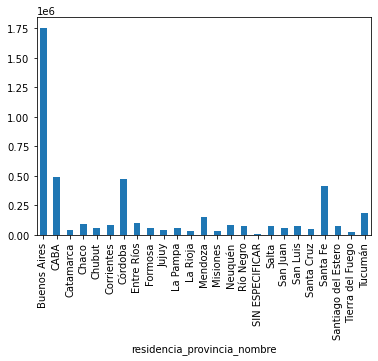

In [26]:
#here I create a simple graph using the "parcel" function grouping the name of each province ("residence_provincia_name") with the number of times that province appears
finfection.groupby("residencia_provincia_nombre")["residencia_provincia_nombre"].count().plot(kind = "bar")

In [27]:
#first i grouping the name of each province ("residence_provincia_name") with the count of times each province appears
df = pd.DataFrame(finfection.groupby("residencia_provincia_nombre")["residencia_provincia_nombre"].count())

#then I change the name of the columns that have the count of times each province appears, the new name of the column is "Casos"
df.rename(columns = {"residencia_provincia_nombre":"Casos Confirmados"}, inplace = True)

#then i order this column in ascending
df = df.sort_values(by='Casos Confirmados',ascending=False)

#then i create a new index and convert the old index in a column
df.reset_index(inplace=True)

#then i change the name of the column(residencia_provincia_nombre) to "Provincias"
df = df.rename(columns = {'residencia_provincia_nombre':'Provincias'})

#here we can see the result
df.head(25)

Provincias  Casos Confirmados
0          Buenos Aires            1755240
1                  CABA             491540
2               Córdoba             474158
3              Santa Fe             413581
4               Tucumán             185448
5               Mendoza             149779
6            Entre Ríos              99459
7                 Chaco              92714
8               Neuquén              84341
9            Corrientes              83701
10             San Luis              76111
11  Santiago del Estero              75294
12            Río Negro              74012
13                Salta              73458
14             La Pampa              62634
15             San Juan              61700
16              Formosa              57519
17               Chubut              56659
18           Santa Cruz              54087
19                Jujuy              44487
20            Catamarca              43893
21             Misiones              31926
22             La Rioja              29629
23     Tierra del Fuego              27231
24      SIN ESPECIFICAR               7409

In [28]:
#here we create a graph using the "plotly.graph_objs" and "plotly.offline"

#here we save the axis "x" and "y" in the varible trace (using the "plotly.graph_objs")
trace = go.Bar(
x = df["Provincias"],
y = df["Casos Confirmados"])

#then i create a graph using the variable "trace"
iplot([trace])

## the sex most prone to infection(of Covid, in Argentina)

In [29]:
finfection.head()

id_evento_caso sexo  edad edad_años_meses residencia_pais_nombre  \
16        10000015    F  48.0            Años              Argentina   
27        10000026    F  24.0            Años              Argentina   
51        10000049    F  73.0            Años              Argentina   
58        10000055    F  42.0            Años              Argentina   
60        10000057    M  35.0            Años              Argentina   

   residencia_provincia_nombre residencia_departamento_nombre  \
16                  Entre Ríos                         Nogoyá   
27                     Córdoba                        Capital   
51                        CABA                      COMUNA 09   
58                        CABA                      COMUNA 09   
60                Buenos Aires                       Mercedes   

   carga_provincia_nombre fecha_inicio_sintomas fecha_apertura  ...  \
16             Entre Ríos            2021-04-03     2021-04-08  ...   
27                Córdoba            2021-04-03     2021-04-08  ...   
51                   CABA                   NaN     2021-04-08  ...   
58                   CABA                   NaN     2021-04-08  ...   
60           Buenos Aires                   NaN     2021-04-08  ...   

    fecha_fallecimiento asistencia_respiratoria_mecanica carga_provincia_id  \
16                  NaN                               NO                 30   
27                  NaN                               NO                 14   
51                  NaN                               NO                  2   
58                  NaN                               NO                  2   
60                  NaN                               NO                  6   

   origen_financiamiento                                      clasificacion  \
16               Público  Caso confirmado por laboratorio - No activo (p...   
27               Público  Caso confirmado por laboratorio - No activo (p...   
51               Público  Caso confirmado por laboratorio - No activo (p...   
58               Público  Caso confirmado por laboratorio - No activo (p...   
60               Público  Caso confirmado por laboratorio - No activo (p...   

   clasificacion_resumen residencia_provincia_id  fecha_diagnostico  \
16            Confirmado                      30         2021-04-08   
27            Confirmado                      14         2021-04-05   
51            Confirmado                       2         2021-04-10   
58            Confirmado                       2         2021-04-14   
60            Confirmado                       6         2021-04-06   

   residencia_departamento_id ultima_actualizacion  
16                         77           2021-08-07  
27                         14           2021-08-07  
51                          9           2021-08-07  
58                          9           2021-08-07  
60                        532           2021-08-07  

[5 rows x 25 columns]

<AxesSubplot:xlabel='sexo'>

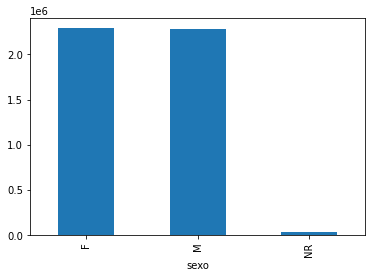

In [30]:
## here I make a simple graph using the "plot" function and group the type of sexes with the count of times that sex appears
finfection.groupby("sexo")["sexo"].count().plot(kind = "bar")

In [31]:
#first i grouping the sexs of each case ("sexo") with the count of times each sexs appears
sex = pd.DataFrame(finfection.groupby("sexo")["sexo"].count())

#then I change the name of the columns that have the count of times each sexs appears, the new name of the column is "Casos"
sex.rename(columns = {"sexo":"Casos Confirmados"}, inplace = True)

#then i order this column in ascending
sex = sex.sort_values(by = "Casos Confirmados",ascending = False)

#then i create a new index and convert the old index in a column
sex.reset_index(inplace = True)

#then i change the name of the column(sexo) to "Sexo"
sex = sex.rename(columns = {"sexo":"Sexo"})

#here we can see the result
sex.head(25)

Sexo  Casos Confirmados
0    F            2288971
1    M            2279673
2   NR              37366

In [32]:
#here we create a graph using the "plotly.graph_objs" and "plotly.offline"

#here we save the axis "x" and "y" in the varible trace (using the "plotly.graph_objs")
trace = go.Bar(
x = sex["Sexo"],
y = sex["Casos Confirmados"])

#then i create a graph using the variable "trace"
iplot([trace])

In [33]:
# here we save the sex data of the cases in variable x
x = finfection["sexo"].value_counts()
x
#here we save the tree possibilities that I can obtain when consulting the data
lables = ["F","M","NR"]

#Here we create a pie chart that contains the data and the percentage of the data (if you position yourself on the area you will see the numbers in percentage) 
trace = go.Pie(labels = lables, values = x, hoverinfo = 'label + percent', textinfo = 'value')
iplot([trace])

## what sex gets more covid tests

In [34]:
# here we save the sex data of the cases in variable x
x = df2["sexo"].value_counts()
x
#here we save the tree possibilities that I can obtain when consulting the data
lables = ["F","M","NR"]

#Here we create a pie chart that contains the data and the percentage of the data (if you position yourself on the area you will see the numbers in percentage) 
trace = go.Pie(labels = lables, values = x, hoverinfo = 'label + percent', textinfo = 'value')
iplot([trace])

## the age most likely to infect (from covid 2020, in Argentina)

In [35]:
finfection.head()

id_evento_caso sexo  edad edad_años_meses residencia_pais_nombre  \
16        10000015    F  48.0            Años              Argentina   
27        10000026    F  24.0            Años              Argentina   
51        10000049    F  73.0            Años              Argentina   
58        10000055    F  42.0            Años              Argentina   
60        10000057    M  35.0            Años              Argentina   

   residencia_provincia_nombre residencia_departamento_nombre  \
16                  Entre Ríos                         Nogoyá   
27                     Córdoba                        Capital   
51                        CABA                      COMUNA 09   
58                        CABA                      COMUNA 09   
60                Buenos Aires                       Mercedes   

   carga_provincia_nombre fecha_inicio_sintomas fecha_apertura  ...  \
16             Entre Ríos            2021-04-03     2021-04-08  ...   
27                Córdoba            2021-04-03     2021-04-08  ...   
51                   CABA                   NaN     2021-04-08  ...   
58                   CABA                   NaN     2021-04-08  ...   
60           Buenos Aires                   NaN     2021-04-08  ...   

    fecha_fallecimiento asistencia_respiratoria_mecanica carga_provincia_id  \
16                  NaN                               NO                 30   
27                  NaN                               NO                 14   
51                  NaN                               NO                  2   
58                  NaN                               NO                  2   
60                  NaN                               NO                  6   

   origen_financiamiento                                      clasificacion  \
16               Público  Caso confirmado por laboratorio - No activo (p...   
27               Público  Caso confirmado por laboratorio - No activo (p...   
51               Público  Caso confirmado por laboratorio - No activo (p...   
58               Público  Caso confirmado por laboratorio - No activo (p...   
60               Público  Caso confirmado por laboratorio - No activo (p...   

   clasificacion_resumen residencia_provincia_id  fecha_diagnostico  \
16            Confirmado                      30         2021-04-08   
27            Confirmado                      14         2021-04-05   
51            Confirmado                       2         2021-04-10   
58            Confirmado                       2         2021-04-14   
60            Confirmado                       6         2021-04-06   

   residencia_departamento_id ultima_actualizacion  
16                         77           2021-08-07  
27                         14           2021-08-07  
51                          9           2021-08-07  
58                          9           2021-08-07  
60                        532           2021-08-07  

[5 rows x 25 columns]

In [36]:
#first group the name of the provinces ("residence_province_name") with the sum of the age of the infected ("age")
ed = pd.DataFrame(finfection.groupby("residencia_provincia_nombre")["edad"].sum())

#then I change the name of the columns that have the sum of age, the new name of the column is "Age_Sum"
ed.rename(columns = {"edad":"Edad_Sum"}, inplace = True)

#then i order this column("Edad_Sum")in ascending
ed = ed.sort_values(by = "Edad_Sum",ascending = False)

#then i create a new index and convert the old index in a column
ed.reset_index(inplace = True)

#then i change the name of the column(residencia_provincia_nombre) to "Provincia"
ed = ed.rename(columns = {'residencia_provincia_nombre':'Provincia'})

#here we can see the result
ed.head(25)

Provincia    Edad_Sum
0          Buenos Aires  72064393.0
1                  CABA  20054404.0
2               Córdoba  17997490.0
3              Santa Fe  17387314.0
4               Tucumán   7371739.0
5               Mendoza   6268064.0
6            Entre Ríos   4128219.0
7                 Chaco   3667167.0
8               Neuquén   3478221.0
9             Río Negro   3132576.0
10           Corrientes   3131429.0
11  Santiago del Estero   3025811.0
12                Salta   3013006.0
13             San Luis   2902084.0
14             San Juan   2432061.0
15             La Pampa   2396147.0
16               Chubut   2321799.0
17           Santa Cruz   2120712.0
18              Formosa   2011863.0
19                Jujuy   1907232.0
20            Catamarca   1688513.0
21             Misiones   1295714.0
22             La Rioja   1178412.0
23     Tierra del Fuego   1093170.0
24      SIN ESPECIFICAR    268875.0

In [37]:
#first group the name of the provinces ("residence_province_name") with the count of the age of the infected ("age")
edc = pd.DataFrame(finfection.groupby("residencia_provincia_nombre")["edad"].count())

#then I change the name of the columns that have the count of each time the age appears, the new name of the column is "Age_Count"
edc.rename(columns = {"edad":"Edad_Count"}, inplace = True)

#then i order this column in ascending
edc = edc.sort_values(by = "Edad_Count",ascending = False)

#then i create a new index and convert the old index in a column
edc.reset_index(inplace = True)

#then i change the name of the column(residencia_provincia_nombre) to "Provincia"
edc = edc.rename(columns = {'residencia_provincia_nombre':'Provincia'})

#here we can see the result
edc.head(24)

Provincia  Edad_Count
0          Buenos Aires     1754731
1                  CABA      491469
2               Córdoba      474125
3              Santa Fe      413562
4               Tucumán      185422
5               Mendoza      149735
6            Entre Ríos       99459
7                 Chaco       92708
8               Neuquén       84335
9            Corrientes       83699
10             San Luis       76108
11  Santiago del Estero       75266
12            Río Negro       74001
13                Salta       73354
14             La Pampa       62616
15             San Juan       61700
16              Formosa       57519
17               Chubut       56637
18           Santa Cruz       54082
19                Jujuy       44459
20            Catamarca       43892
21             Misiones       31926
22             La Rioja       29629
23     Tierra del Fuego       27231

In [38]:
#here we create a new avrible "Edad_promedio"
#"Edad_promedio" is the merge the dataframe "ed" with the data frame "edc"
Edad_promedio = ed.merge(edc, left_on = "Provincia", right_on = "Provincia", how = "inner")

#here we can see the result
Edad_promedio

Provincia    Edad_Sum  Edad_Count
0          Buenos Aires  72064393.0     1754731
1                  CABA  20054404.0      491469
2               Córdoba  17997490.0      474125
3              Santa Fe  17387314.0      413562
4               Tucumán   7371739.0      185422
5               Mendoza   6268064.0      149735
6            Entre Ríos   4128219.0       99459
7                 Chaco   3667167.0       92708
8               Neuquén   3478221.0       84335
9             Río Negro   3132576.0       74001
10           Corrientes   3131429.0       83699
11  Santiago del Estero   3025811.0       75266
12                Salta   3013006.0       73354
13             San Luis   2902084.0       76108
14             San Juan   2432061.0       61700
15             La Pampa   2396147.0       62616
16               Chubut   2321799.0       56637
17           Santa Cruz   2120712.0       54082
18              Formosa   2011863.0       57519
19                Jujuy   1907232.0       44459
20            Catamarca   1688513.0       43892
21             Misiones   1295714.0       31926
22             La Rioja   1178412.0       29629
23     Tierra del Fuego   1093170.0       27231
24      SIN ESPECIFICAR    268875.0        7394

In [39]:
#here i make a new "Media_Edad" column  in our "Edad_promedio" dataframe 
#this column is the average age of each case in each province
Edad_promedio["Media_Edad"] = Edad_promedio["Edad_Sum"] / Edad_promedio["Edad_Count"]

# here I sort the column "Media_Edad" in ascending order
Edad_promedio = Edad_promedio.sort_values(by = "Media_Edad",ascending = False)


#here we can see the result
Edad_promedio

Provincia    Edad_Sum  Edad_Count  Media_Edad
19                Jujuy   1907232.0       44459   42.898671
9             Río Negro   3132576.0       74001   42.331536
3              Santa Fe  17387314.0      413562   42.042823
5               Mendoza   6268064.0      149735   41.861048
6            Entre Ríos   4128219.0       99459   41.506741
8               Neuquén   3478221.0       84335   41.242912
12                Salta   3013006.0       73354   41.074870
0          Buenos Aires  72064393.0     1754731   41.068627
16               Chubut   2321799.0       56637   40.994385
1                  CABA  20054404.0      491469   40.805023
21             Misiones   1295714.0       31926   40.584915
11  Santiago del Estero   3025811.0       75266   40.201565
23     Tierra del Fuego   1093170.0       27231   40.144321
22             La Rioja   1178412.0       29629   39.772250
4               Tucumán   7371739.0      185422   39.756550
7                 Chaco   3667167.0       92708   39.556101
14             San Juan   2432061.0       61700   39.417520
17           Santa Cruz   2120712.0       54082   39.212899
20            Catamarca   1688513.0       43892   38.469721
15             La Pampa   2396147.0       62616   38.267328
13             San Luis   2902084.0       76108   38.131129
2               Córdoba  17997490.0      474125   37.959378
10           Corrientes   3131429.0       83699   37.412980
24      SIN ESPECIFICAR    268875.0        7394   36.363944
18              Formosa   2011863.0       57519   34.977364

<AxesSubplot:xlabel='Provincia'>

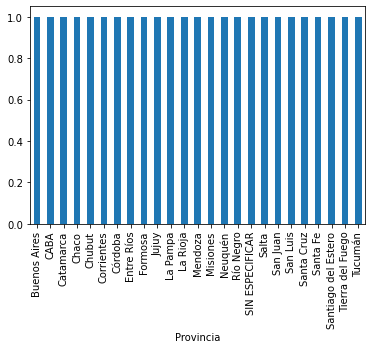

In [40]:
#here i crete a simple grahp using "plot" function and the columns "Provincia" and "Media_Edad"
Edad_promedio.groupby("Provincia")["Media_Edad"].count().plot(kind = "bar")

In [41]:
#here we create a graph using the "plotly.graph_objs" and "plotly.offline"
#here we save the axis "x" and "y" in the varible trace (using the "plotly.graph_objs")trace = go.Bar(
trace = go.Bar(
    x = Edad_promedio["Provincia"],
    y = Edad_promedio["Media_Edad"])

#then i create a graph using the variable "trace"
iplot([trace])

## Geographic analysis(of Covid, in Argentina)

In [42]:
df.head(25)

Provincias  Casos Confirmados
0          Buenos Aires            1755240
1                  CABA             491540
2               Córdoba             474158
3              Santa Fe             413581
4               Tucumán             185448
5               Mendoza             149779
6            Entre Ríos              99459
7                 Chaco              92714
8               Neuquén              84341
9            Corrientes              83701
10             San Luis              76111
11  Santiago del Estero              75294
12            Río Negro              74012
13                Salta              73458
14             La Pampa              62634
15             San Juan              61700
16              Formosa              57519
17               Chubut              56659
18           Santa Cruz              54087
19                Jujuy              44487
20            Catamarca              43893
21             Misiones              31926
22             La Rioja              29629
23     Tierra del Fuego              27231
24      SIN ESPECIFICAR               7409

In [43]:
x = df.replace({'Buenos Aires':'Buenos Aires, Argentina', 'CABA':'Ciudad Autónoma de Buenos Aires', 'Santa Fe':'Santa Fe, Argentina', 'Entre Ríos':'Entre Ríos, Argentina', 'Córdoba':'Córdoba, Argentina',
       'San Luis':'San Luis, Argentina', 'Mendoza':'Mendoza, Argentina', 'Santa Cruz':'Santa Cruz, Argentina', 'La Pampa':'La Pampa, Argentina', 'Chaco':'Chaco, Argentina',
       'Formosa':'Formosa, Argentina', 'Salta':'Salta, Argentina', 'Neuquén':'Neuquén, Argentina', 'Chubut':'Chubut, Argentina', 'Santiago del Estero':'Santiago del Estero, Argentina',
       'Río Negro':'Río Negro, Argentina', 'Tucumán':'Tucumán, Argentina', 'San Juan':'San Juan, Argentina', 'Catamarca':'Catamarca, Argentina', 'La Rioja':'La Rioja, Argentina',
       'Tierra del Fuego':'Tierra del Fuego, Argentina', 'Corrientes':'Corrientes, Argentina', 'Jujuy':'Jujuy, Argentina', 'Misiones':'Misiones, Argentina'})

In [44]:
# here we can see the number of columns and rows, with the function shape
x.shape

(25, 2)

In [46]:
#here i create a variable that searches a ubication(with the library geopy)
geolocator = Nominatim(user_agent = "app")

#here we create a list that save a latitude and longitude
lat_lon = []
# here we create a loop that iterates through the locations of the names
for location in x["Provincias"]:
    location = geolocator.geocode(location)# here we convert the names of the locations into a coordinate
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo = (location.latitude, location.longitude)#in this variables we save the latitude and longitude 
        lat_lon.append(geo)#here we add the coordinates a the list
        

In [ ]:
x["geo_loc"] = lat_lon
x.head(25)

In [236]:
x.dtypes

Provincias           object
Casos Confirmados     int64
geo_loc              object
dtype: object

In [237]:
#here we can see all the lost data in each column(in df)
#here we can see that this data frame has some missing data
x.isnull().sum()

Provincias           0
Casos Confirmados    0
geo_loc              1
dtype: int64

In [238]:
#here we delete the missing or incomplete information(indf)
x.dropna(axis = "index" ,subset = ["geo_loc"] ,inplace = True)

#now you can see i am not missing data in get_loc columns(THIS IS IMPORTANT FOR THE FOLLOWING)
x.isnull().sum()

Provincias           0
Casos Confirmados    0
geo_loc              0
dtype: int64

In [239]:
#here i join all data of the geo_loc in a one list 
np.array(x["geo_loc"])

array([(-34.6075682, -58.4370894), (-34.6075682, -58.4370894),
       (-31.4173391, -64.183319), (-30.3154739, -61.1645076),
       (-26.5643582, -64.882397),
       (-34.787093049999996, -68.43818677312292),
       (-31.6252842, -59.3539578), (-26.3829647, -60.8816092),
       (-38.3695057, -69.832275), (-28.5912315, -57.9394658),
       (-33.2762202, -65.9515546), (-27.6431016, -63.5408542),
       (-40.4811973, -67.6145911), (-25.1076701, -64.3494964),
       (-37.2314643, -65.3972948), (-30.7054363, -69.1988222),
       (-24.5955306, -60.4289718), (-43.7128356, -68.7461817),
       (-48.5693327, -70.1606767), (-23.3161458, -65.7595288),
       (-27.1910825, -67.105374), (-26.737224, -54.4315257),
       (-29.9729781, -67.0487944), (-54.4071064, -67.8974895)],
      dtype=object)

In [240]:
#here we separate the data in the latitude and the longitude(and create a variables lat and lot that save this data)
lat, lon = zip(*np.array(x["geo_loc"]))

In [241]:
#here i create a new columns lat and lon with variables lat and lot (in the Restaurant_locations dataframe)
x["lat"] = lat
x["lon"] = lon

#here i see the type of data that is lat
type(lat)

tuple

In [242]:
#here you can see the results
x.head(25)

Provincias  Casos Confirmados  \
0           Buenos Aires, Argentina            1755240   
1   Ciudad Autónoma de Buenos Aires             491540   
2                Córdoba, Argentina             474158   
3               Santa Fe, Argentina             413581   
4                Tucumán, Argentina             185448   
5                Mendoza, Argentina             149779   
6             Entre Ríos, Argentina              99459   
7                  Chaco, Argentina              92714   
8                Neuquén, Argentina              84341   
9             Corrientes, Argentina              83701   
10              San Luis, Argentina              76111   
11   Santiago del Estero, Argentina              75294   
12             Río Negro, Argentina              74012   
13                 Salta, Argentina              73458   
14              La Pampa, Argentina              62634   
15              San Juan, Argentina              61700   
16               Formosa, Argentina              57519   
17                Chubut, Argentina              56659   
18            Santa Cruz, Argentina              54087   
19                 Jujuy, Argentina              44487   
20             Catamarca, Argentina              43893   
21              Misiones, Argentina              31926   
22              La Rioja, Argentina              29629   
23      Tierra del Fuego, Argentina              27231   

                                      geo_loc        lat        lon  
0                  (-34.6075682, -58.4370894) -34.607568 -58.437089  
1                  (-34.6075682, -58.4370894) -34.607568 -58.437089  
2                   (-31.4173391, -64.183319) -31.417339 -64.183319  
3                  (-30.3154739, -61.1645076) -30.315474 -61.164508  
4                   (-26.5643582, -64.882397) -26.564358 -64.882397  
5   (-34.787093049999996, -68.43818677312292) -34.787093 -68.438187  
6                  (-31.6252842, -59.3539578) -31.625284 -59.353958  
7                  (-26.3829647, -60.8816092) -26.382965 -60.881609  
8                   (-38.3695057, -69.832275) -38.369506 -69.832275  
9                  (-28.5912315, -57.9394658) -28.591231 -57.939466  
10                 (-33.2762202, -65.9515546) -33.276220 -65.951555  
11                 (-27.6431016, -63.5408542) -27.643102 -63.540854  
12                 (-40.4811973, -67.6145911) -40.481197 -67.614591  
13                 (-25.1076701, -64.3494964) -25.107670 -64.349496  
14                 (-37.2314643, -65.3972948) -37.231464 -65.397295  
15                 (-30.7054363, -69.1988222) -30.705436 -69.198822  
16                 (-24.5955306, -60.4289718) -24.595531 -60.428972  
17                 (-43.7128356, -68.7461817) -43.712836 -68.746182  
18                 (-48.5693327, -70.1606767) -48.569333 -70.160677  
19                 (-23.3161458, -65.7595288) -23.316146 -65.759529  
20                  (-27.1910825, -67.105374) -27.191083 -67.105374  
21                  (-26.737224, -54.4315257) -26.737224 -54.431526  
22                 (-29.9729781, -67.0487944) -29.972978 -67.048794  
23                 (-54.4071064, -67.8974895) -54.407106 -67.897490

In [243]:
#here i delete the geo_loc column, why the lat and lot columns already do their job (even better).
x.drop("geo_loc", axis = 1, inplace = True)
x.head(25)

Provincias  Casos Confirmados        lat        lon
0           Buenos Aires, Argentina            1755240 -34.607568 -58.437089
1   Ciudad Autónoma de Buenos Aires             491540 -34.607568 -58.437089
2                Córdoba, Argentina             474158 -31.417339 -64.183319
3               Santa Fe, Argentina             413581 -30.315474 -61.164508
4                Tucumán, Argentina             185448 -26.564358 -64.882397
5                Mendoza, Argentina             149779 -34.787093 -68.438187
6             Entre Ríos, Argentina              99459 -31.625284 -59.353958
7                  Chaco, Argentina              92714 -26.382965 -60.881609
8                Neuquén, Argentina              84341 -38.369506 -69.832275
9             Corrientes, Argentina              83701 -28.591231 -57.939466
10              San Luis, Argentina              76111 -33.276220 -65.951555
11   Santiago del Estero, Argentina              75294 -27.643102 -63.540854
12             Río Negro, Argentina              74012 -40.481197 -67.614591
13                 Salta, Argentina              73458 -25.107670 -64.349496
14              La Pampa, Argentina              62634 -37.231464 -65.397295
15              San Juan, Argentina              61700 -30.705436 -69.198822
16               Formosa, Argentina              57519 -24.595531 -60.428972
17                Chubut, Argentina              56659 -43.712836 -68.746182
18            Santa Cruz, Argentina              54087 -48.569333 -70.160677
19                 Jujuy, Argentina              44487 -23.316146 -65.759529
20             Catamarca, Argentina              43893 -27.191083 -67.105374
21              Misiones, Argentina              31926 -26.737224 -54.431526
22              La Rioja, Argentina              29629 -29.972978 -67.048794
23      Tierra del Fuego, Argentina              27231 -54.407106 -67.897490

In [244]:
#here we create a function that can show a specific location in a map 
def generatebasemap(defult_location = [-34.607568,-58.437089], default_zoom_star= 12):
    basemap = folium.Map(location = defult_location, zoom_star = default_zoom_star)
    return basemap

In [245]:
#here we here we assign the function a the variable basemap
basemap = generatebasemap()
basemap

In [246]:

#using the "basemap" function and the "HeatMap" library I create a heatmap with the cases of each province
HeatMap(x[["lat","lon","Casos Confirmados"]].values.tolist(), zoom = 20, radius = 18).add_to(basemap)
basemap

## The evolution of the covid in each province over time

In [247]:
finfection.head()

id_evento_caso sexo  edad edad_años_meses residencia_pais_nombre  \
16        10000015    F  48.0            Años              Argentina   
27        10000026    F  24.0            Años              Argentina   
51        10000049    F  73.0            Años              Argentina   
58        10000055    F  42.0            Años              Argentina   
60        10000057    M  35.0            Años              Argentina   

   residencia_provincia_nombre residencia_departamento_nombre  \
16                  Entre Ríos                         Nogoyá   
27                     Córdoba                        Capital   
51                        CABA                      COMUNA 09   
58                        CABA                      COMUNA 09   
60                Buenos Aires                       Mercedes   

   carga_provincia_nombre fecha_inicio_sintomas fecha_apertura  ...  \
16             Entre Ríos            2021-04-03     2021-04-08  ...   
27                Córdoba            2021-04-03     2021-04-08  ...   
51                   CABA                   NaN     2021-04-08  ...   
58                   CABA                   NaN     2021-04-08  ...   
60           Buenos Aires                   NaN     2021-04-08  ...   

    fecha_fallecimiento asistencia_respiratoria_mecanica carga_provincia_id  \
16                  NaN                               NO                 30   
27                  NaN                               NO                 14   
51                  NaN                               NO                  2   
58                  NaN                               NO                  2   
60                  NaN                               NO                  6   

   origen_financiamiento                                      clasificacion  \
16               Público  Caso confirmado por laboratorio - No activo (p...   
27               Público  Caso confirmado por laboratorio - No activo (p...   
51               Público  Caso confirmado por laboratorio - No activo (p...   
58               Público  Caso confirmado por laboratorio - No activo (p...   
60               Público  Caso confirmado por laboratorio - No activo (p...   

   clasificacion_resumen residencia_provincia_id  fecha_diagnostico  \
16            Confirmado                      30         2021-04-08   
27            Confirmado                      14         2021-04-05   
51            Confirmado                       2         2021-04-10   
58            Confirmado                       2         2021-04-14   
60            Confirmado                       6         2021-04-06   

   residencia_departamento_id ultima_actualizacion  
16                         77           2021-08-07  
27                         14           2021-08-07  
51                          9           2021-08-07  
58                          9           2021-08-07  
60                        532           2021-08-07  

[5 rows x 25 columns]

In [250]:
#here I group the columns "residence province name" and "fecha_diagnostico" of the data frame and then I count the types of values of the column "fecha_diagnostico"
time = pd.DataFrame(finfection.groupby("residencia_provincia_nombre")["fecha_diagnostico"].value_counts())

#then i change the name of the "fecha_diagnostico" column to "Total"
time.rename(columns = {"fecha_diagnostico":"Total"}, inplace = True)

#then I order the values in ascending order(of the column Total)
time = time.sort_values(by = "Total",ascending = False)

#then y convert the index to column("residencia_provincia_nombre") and crete the index 
time.reset_index(inplace = True)

#then i chage the name of "residencia_provincia_nombre" to "Provincia"
time = time.rename(columns = {'residencia_provincia_nombre':'Provincia'})

#here can see the results
time.head()

Provincia fecha_diagnostico  Total
0  Buenos Aires        2021-05-26  13371
1  Buenos Aires        2021-05-18  12951
2  Buenos Aires        2021-05-27  12926
3  Buenos Aires        2021-04-20  12603
4  Buenos Aires        2021-05-19  12577

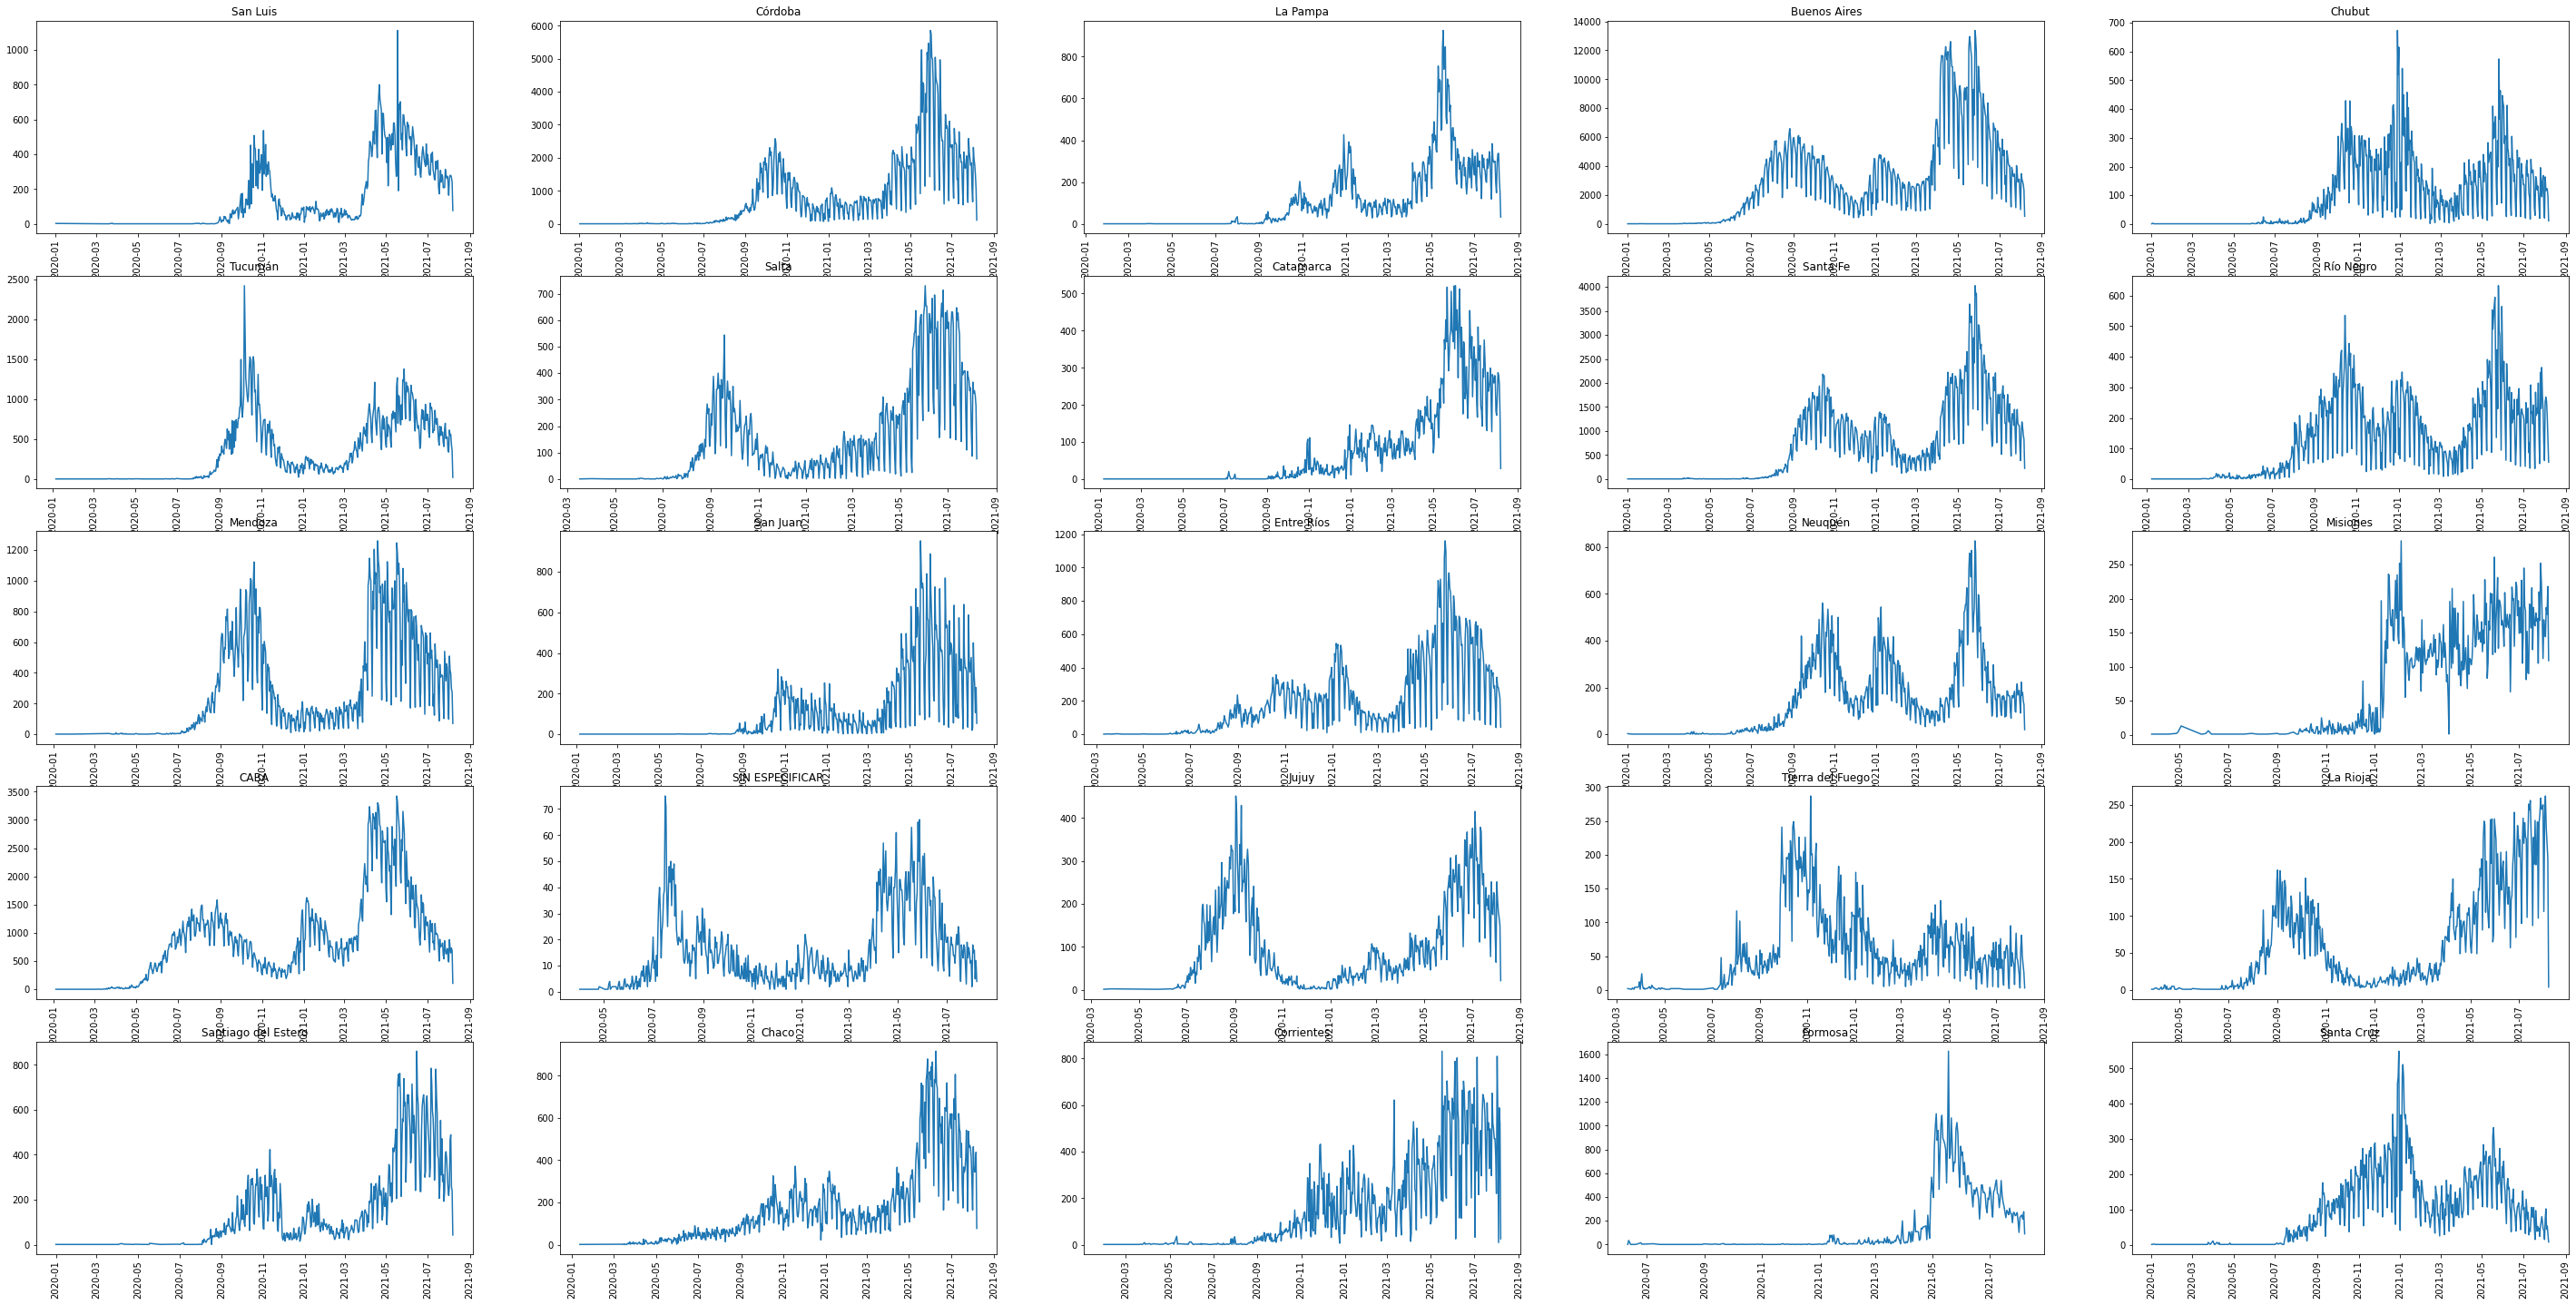

In [254]:
#here i order the values of the "fecha_diagnostico" in ascending order
time = time.sort_values(by = "fecha_diagnostico",ascending = False)

#with the function to_datetime(of pandas)we can convert the date string in date object
#here I convert the "diagnostic_date" to data type date
time["fecha_diagnostico"] = pd.to_datetime(time["fecha_diagnostico"])

#here we extract the names of the provinces
#the function "unique ()" extract the unique values of a column
Province_list = time["Provincia"].unique()

#here set the image size
plt.figure(figsize = (50,25))

#here i create a simple grahp for each province
for i,Province in enumerate (Province_list,1):
    plt.subplot(5,5,i)#here I set the number of rows and columns that the image will have (rows and columns made up of graphics)
    XX = time[time["Provincia"] == Province]#here I create the variable "XX" this variable has the data of the current province(in the "for" loop)
    
    plt.plot(XX ["fecha_diagnostico"],XX ["Total"])#here I create a simple graph using the "diagnosis_date" and the "Total" of the current province (in the "for" loop)
    plt.xticks(rotation = "vertical")#here i set the graph
    plt.title(Province)#and at the end I set the title of the graphic with the name of the province

In [255]:
#here i create a interactive graph with Evolution of the coronavirus over time (in each Province) using tha lebrary "plotly.express"

for Province in Province_list:#here I create a loop that goes through each province
    XX = time[time["Provincia"] == Province]#here I create the variable "XX" this variable has the data of the current province(in the "for" loop)
    fig = px.line(XX, x = "fecha_diagnostico", y = "Total", title = Province)#then a create a graph using my variable "XX" as dataframe, and the data in "fecha_diagnostico" and "Total" columns
    fig.show()#and here we can see the results

## Correlation of the case between provinces

In [63]:
#here i crete a new dataframe of every type values of the "Provincia" column of the "time" datafreme
Buenos_Aires = pd.DataFrame(time[time["Provincia"] == "Buenos Aires"])
CABA = pd.DataFrame(time[time["Provincia"] == "CABA"])
Córdoba = pd.DataFrame(time[time["Provincia"] == "Córdoba"])
Santa_Fe = pd.DataFrame(time[time["Provincia"] == "Santa Fe"])
Tucumán = pd.DataFrame(time[time["Provincia"] == "Tucumán"])
Mendoza = pd.DataFrame(time[time["Provincia"] == "Mendoza"])
Entre_Ríos = pd.DataFrame(time[time["Provincia"] == "Entre Ríos"])
Neuquén = pd.DataFrame(time[time["Provincia"] == "Neuquén"])
Río_Negro = pd.DataFrame(time[time["Provincia"] == "Río Negro"])
Chaco = pd.DataFrame(time[time["Provincia"] == "Chaco"])
Corrientes = pd.DataFrame(time[time["Provincia"] == "Corrientes"])
Chubut = pd.DataFrame(time[time["Provincia"] == "Chubut"])
Salta = pd.DataFrame(time[time["Provincia"] == "Salta"])
San_Luis = pd.DataFrame(time[time["Provincia"] == "San Luis"])
Santiago_del_Estero = pd.DataFrame(time[time["Provincia"] == "Santiago del Estero"])
La_Pampa = pd.DataFrame(time[time["Provincia"] == "La Pampa"])
San_Juan = pd.DataFrame(time[time["Provincia"] == "San Juan"])
Santa_Cruz = pd.DataFrame(time[time["Provincia"] == "Santa Cruz"])
Formosa = pd.DataFrame(time[time["Provincia"] == "Formosa"])
Jujuy = pd.DataFrame(time[time["Provincia"] == "Jujuy"])
Catamarca = pd.DataFrame(time[time["Provincia"] == "Catamarca"])
Misiones = pd.DataFrame(time[time["Provincia"] == "Misiones"])
Tierra_del_Fuego = pd.DataFrame(time[time["Provincia"] == "Tierra del Fuego"])
La_Rioja = pd.DataFrame(time[time["Provincia"] == "La Rioja"])

#here i chege the name of the "Total" column to "Total type dataframe" in each dataframe
Buenos_Aires.rename(columns = {"Total":"Total Confirmado Buenos Aires"}, inplace = True)
CABA.rename(columns = {"Total":"Total Confirmado CABA"}, inplace = True)
Córdoba.rename(columns = {"Total":"Total Confirmado Córdoba"}, inplace = True)
Santa_Fe.rename(columns = {"Total":"Total Confirmado Santa"}, inplace = True)
Tucumán.rename(columns = {"Total":"Total Confirmado Tucumán"}, inplace = True)
Mendoza.rename(columns = {"Total":"Total Confirmado Mendoza"}, inplace = True)
Entre_Ríos.rename(columns = {"Total":"Total Confirmado Entre Ríos"}, inplace = True)
Neuquén.rename(columns = {"Total":"Total Confirmado Neuquén"}, inplace = True)
Río_Negro.rename(columns = {"Total":"Total Confirmado Río_Negro"}, inplace = True)
Chaco.rename(columns = {"Total":"Total Confirmado Chaco"}, inplace = True)
Corrientes.rename(columns = {"Total":"Total Confirmado Corrientes"}, inplace = True)
Chubut.rename(columns = {"Total":"Total Confirmado Chubut"}, inplace = True)
Salta.rename(columns = {"Total":"Total Confirmado Salta"}, inplace = True)
San_Luis.rename(columns = {"Total":"Total Confirmado San Luis"}, inplace = True)
Santiago_del_Estero.rename(columns = {"Total":"Total Confirmado Santiago del Estero"}, inplace = True)
La_Pampa.rename(columns = {"Total":"Total Confirmado La Pampa"}, inplace = True)
San_Juan.rename(columns = {"Total":"Total Confirmado San Juan"}, inplace = True)
Santa_Cruz.rename(columns = {"Total":"Total Confirmado Santa Cruz"}, inplace = True)
Formosa.rename(columns = {"Total":"Total Confirmado Formosa"}, inplace = True)
Jujuy.rename(columns = {"Total":"Total Confirmado Jujuy"}, inplace = True)
Catamarca.rename(columns = {"Total":"Total Confirmado Catamarca"}, inplace = True)
Misiones.rename(columns = {"Total":"Total Confirmado Misiones"}, inplace = True)
Tierra_del_Fuego.rename(columns = {"Total":"Total Confirmado Tierra del Fuego"}, inplace = True)
La_Rioja.rename(columns = {"Total":"Total Confirmado La Rioja"}, inplace = True)

# then each dataframe works with dataframe "time2" and I merge using column "fecha_diagnostico" (then I remove this column to not create recursion)
Buenos_Aires = Buenos_Aires.merge(CABA, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Córdoba, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Santa_Fe, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Tucumán, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Mendoza, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Entre_Ríos, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Neuquén, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Río_Negro, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Chaco, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Corrientes, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Chubut, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Salta, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(San_Luis, on = "fecha_diagnostico", how = "left").dropna()
Buenos_Aires = Buenos_Aires.merge(Santiago_del_Estero, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(La_Pampa, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(San_Juan, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Santa_Cruz, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Formosa, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Jujuy, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Catamarca, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Misiones, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(Tierra_del_Fuego, on = "fecha_diagnostico", how = "left")
Buenos_Aires = Buenos_Aires.merge(La_Rioja, on = "fecha_diagnostico", how = "left")
#then delete some the unnecessary columns 
Buenos_Aires.drop("Provincia_x", axis = 1, inplace = True)
Buenos_Aires.drop("Provincia_y", axis = 1, inplace = True)

#then assign the values to the variable time2
time2 = Buenos_Aires

#here you can see the results
time2

fecha_diagnostico  Total Confirmado Buenos Aires  Total Confirmado CABA  \
0          2021-08-07                            520                  107.0   
1          2021-08-06                           2293                  681.0   
2          2021-08-05                           2708                  730.0   
3          2021-08-04                           2923                  644.0   
4          2021-08-03                           3074                  738.0   
..                ...                            ...                    ...   
353        2020-08-01                           3479                 1065.0   
354        2020-07-30                           4330                 1167.0   
355        2020-07-28                           4195                 1267.0   
356        2020-07-24                           4471                 1318.0   
357        2020-07-22                           4082                 1209.0   

     Total Confirmado Córdoba  Total Confirmado Santa  \
0                       112.0                   222.0   
1                      1047.0                   818.0   
2                      1480.0                   921.0   
3                      1785.0                  1077.0   
4                      1957.0                  1189.0   
..                        ...                     ...   
353                      92.0                    88.0   
354                      72.0                    42.0   
355                      84.0                    66.0   
356                      71.0                    30.0   
357                      67.0                    48.0   

     Total Confirmado Tucumán  Total Confirmado Mendoza  \
0                        20.0                      70.0   
1                       353.0                     273.0   
2                       432.0                     297.0   
3                       559.0                     393.0   
4                       550.0                     418.0   
..                        ...                       ...   
353                      28.0                      69.0   
354                      14.0                     108.0   
355                      11.0                      68.0   
356                      11.0                      76.0   
357                       4.0                      42.0   

     Total Confirmado Entre Ríos  Total Confirmado Neuquén  \
0                           43.0                      20.0   
1                          216.0                     127.0   
2                          249.0                     142.0   
3                          279.0                     179.0   
4                          286.0                     167.0   
..                           ...                       ...   
353                         12.0                      19.0   
354                         22.0                      33.0   
355                          8.0                      30.0   
356                         11.0                      13.0   
357                         28.0                      18.0   

     Total Confirmado Río_Negro  ...  Total Confirmado Santiago del Estero  \
0                          56.0  ...                                  43.0   
1                         131.0  ...                                 239.0   
2                         205.0  ...                                 258.0   
3                         254.0  ...                                 489.0   
4                         268.0  ...                                 464.0   
..                          ...  ...                                   ...   
353                        75.0  ...                                   NaN   
354                       107.0  ...                                   2.0   
355                        66.0  ...                                   1.0   
356                        53.0  ...                                   1.0   
357                        60.0  ...                      

In [64]:
#Here I create the variable "time3 " which is basically "time2" without the column "diagnostic_date", because it is not necessary for the following
time3 = time2
time3.drop("fecha_diagnostico", axis = 1, inplace = True)

#here I change all the "NaN" values to 0 so that it does not represent a problem for me in the future
time3.fillna(0)

Total Confirmado Buenos Aires  Total Confirmado CABA  \
0                              520                  107.0   
1                             2293                  681.0   
2                             2708                  730.0   
3                             2923                  644.0   
4                             3074                  738.0   
..                             ...                    ...   
353                           3479                 1065.0   
354                           4330                 1167.0   
355                           4195                 1267.0   
356                           4471                 1318.0   
357                           4082                 1209.0   

     Total Confirmado Córdoba  Total Confirmado Santa  \
0                       112.0                   222.0   
1                      1047.0                   818.0   
2                      1480.0                   921.0   
3                      1785.0                  1077.0   
4                      1957.0                  1189.0   
..                        ...                     ...   
353                      92.0                    88.0   
354                      72.0                    42.0   
355                      84.0                    66.0   
356                      71.0                    30.0   
357                      67.0                    48.0   

     Total Confirmado Tucumán  Total Confirmado Mendoza  \
0                        20.0                      70.0   
1                       353.0                     273.0   
2                       432.0                     297.0   
3                       559.0                     393.0   
4                       550.0                     418.0   
..                        ...                       ...   
353                      28.0                      69.0   
354                      14.0                     108.0   
355                      11.0                      68.0   
356                      11.0                      76.0   
357                       4.0                      42.0   

     Total Confirmado Entre Ríos  Total Confirmado Neuquén  \
0                           43.0                      20.0   
1                          216.0                     127.0   
2                          249.0                     142.0   
3                          279.0                     179.0   
4                          286.0                     167.0   
..                           ...                       ...   
353                         12.0                      19.0   
354                         22.0                      33.0   
355                          8.0                      30.0   
356                         11.0                      13.0   
357                         28.0                      18.0   

     Total Confirmado Río_Negro  Total Confirmado Chaco  ...  \
0                          56.0                    77.0  ...   
1                         131.0                   438.0  ...   
2                         205.0                   358.0  ...   
3                         254.0                   344.0  ...   
4                         268.0                   367.0  ...   
..                          ...                     ...  ...   
353                        75.0                    45.0  ...   
354                       107.0                    56.0  ...   
355                        66.0                    83.0  ...   
356                        53.0                    39.0  ...   
357                        60.0                    49.0  ...   

     Total Confirmado Santiago del Estero  Total Confirmado La Pampa  \
0                                    43.0                       33.0   
1                                   239.0                      156.0   
2                                   258.0                      216.0   
3                                   489.0                      338.0   
4   

<AxesSubplot:>

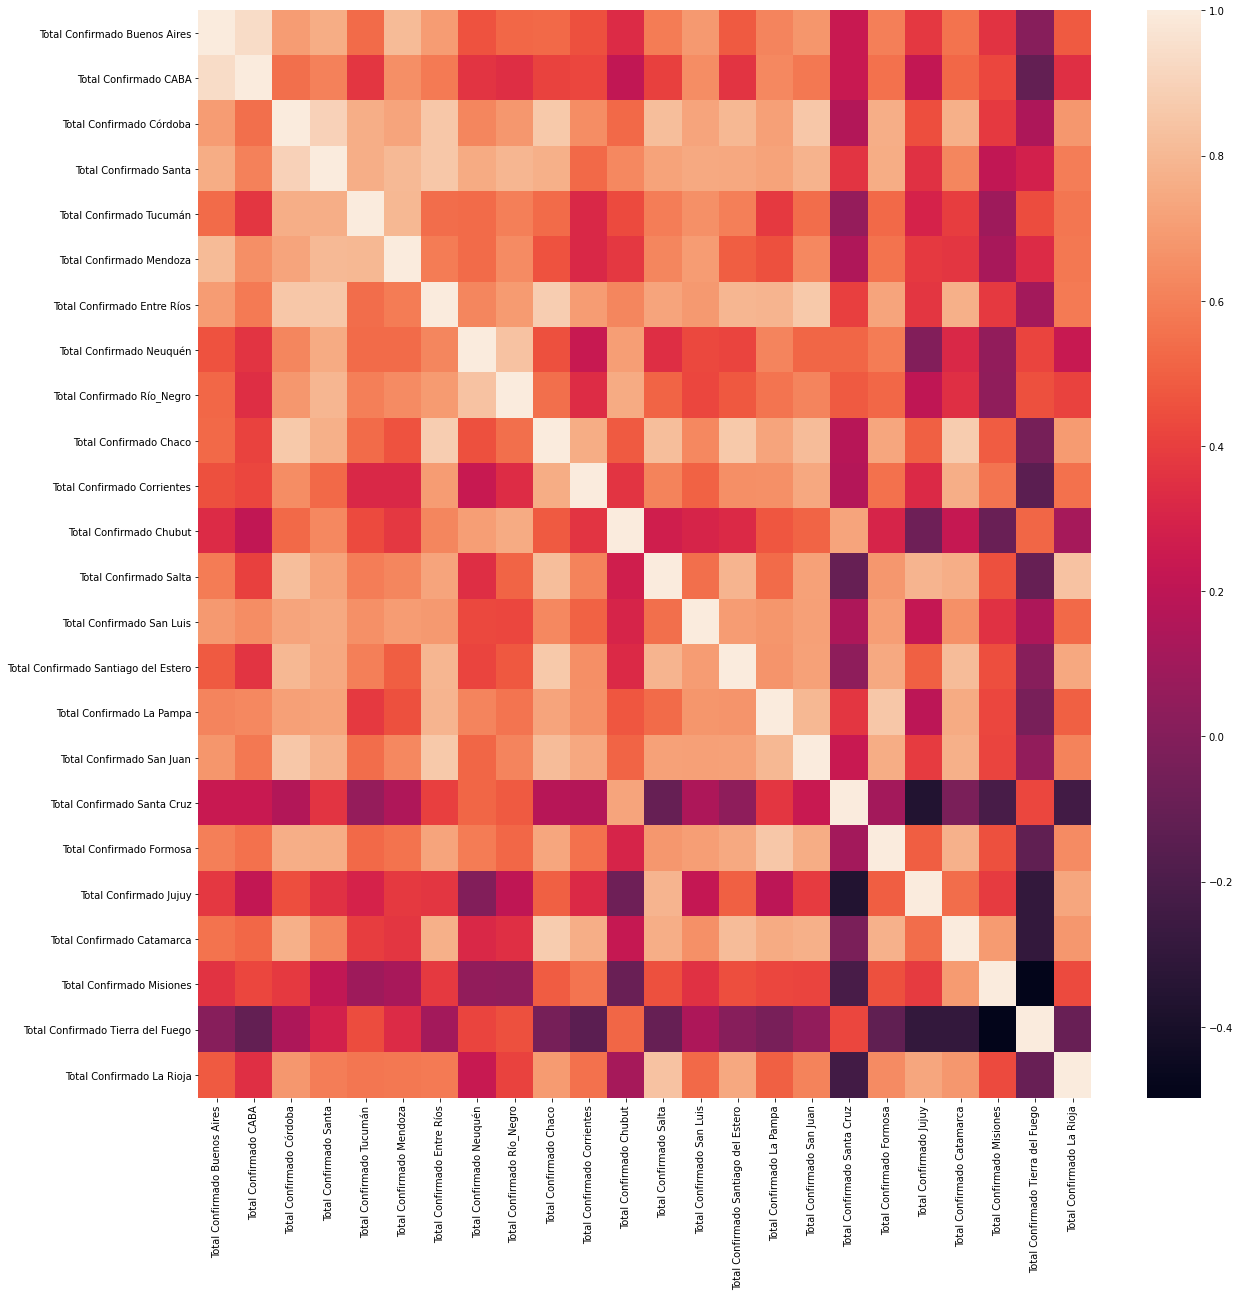

In [65]:
##here I create a heat map to see the correlation between provinces with respect to the evolution of Covid 19 over time

#here i stable the size to the heatmap
fig, ax = plt.subplots(figsize = (20,20))

# here I created the heatmap using the "seaborn" library, then I set the variables "xticklabels" and "yticklabels" to True to be able to see the names of the provinces without them overlapping, so I apply the variable "ax" to set the size
sns.heatmap(time3.corr(), xticklabels = True, yticklabels = True, ax = ax)
#(you can see that the same provinces)

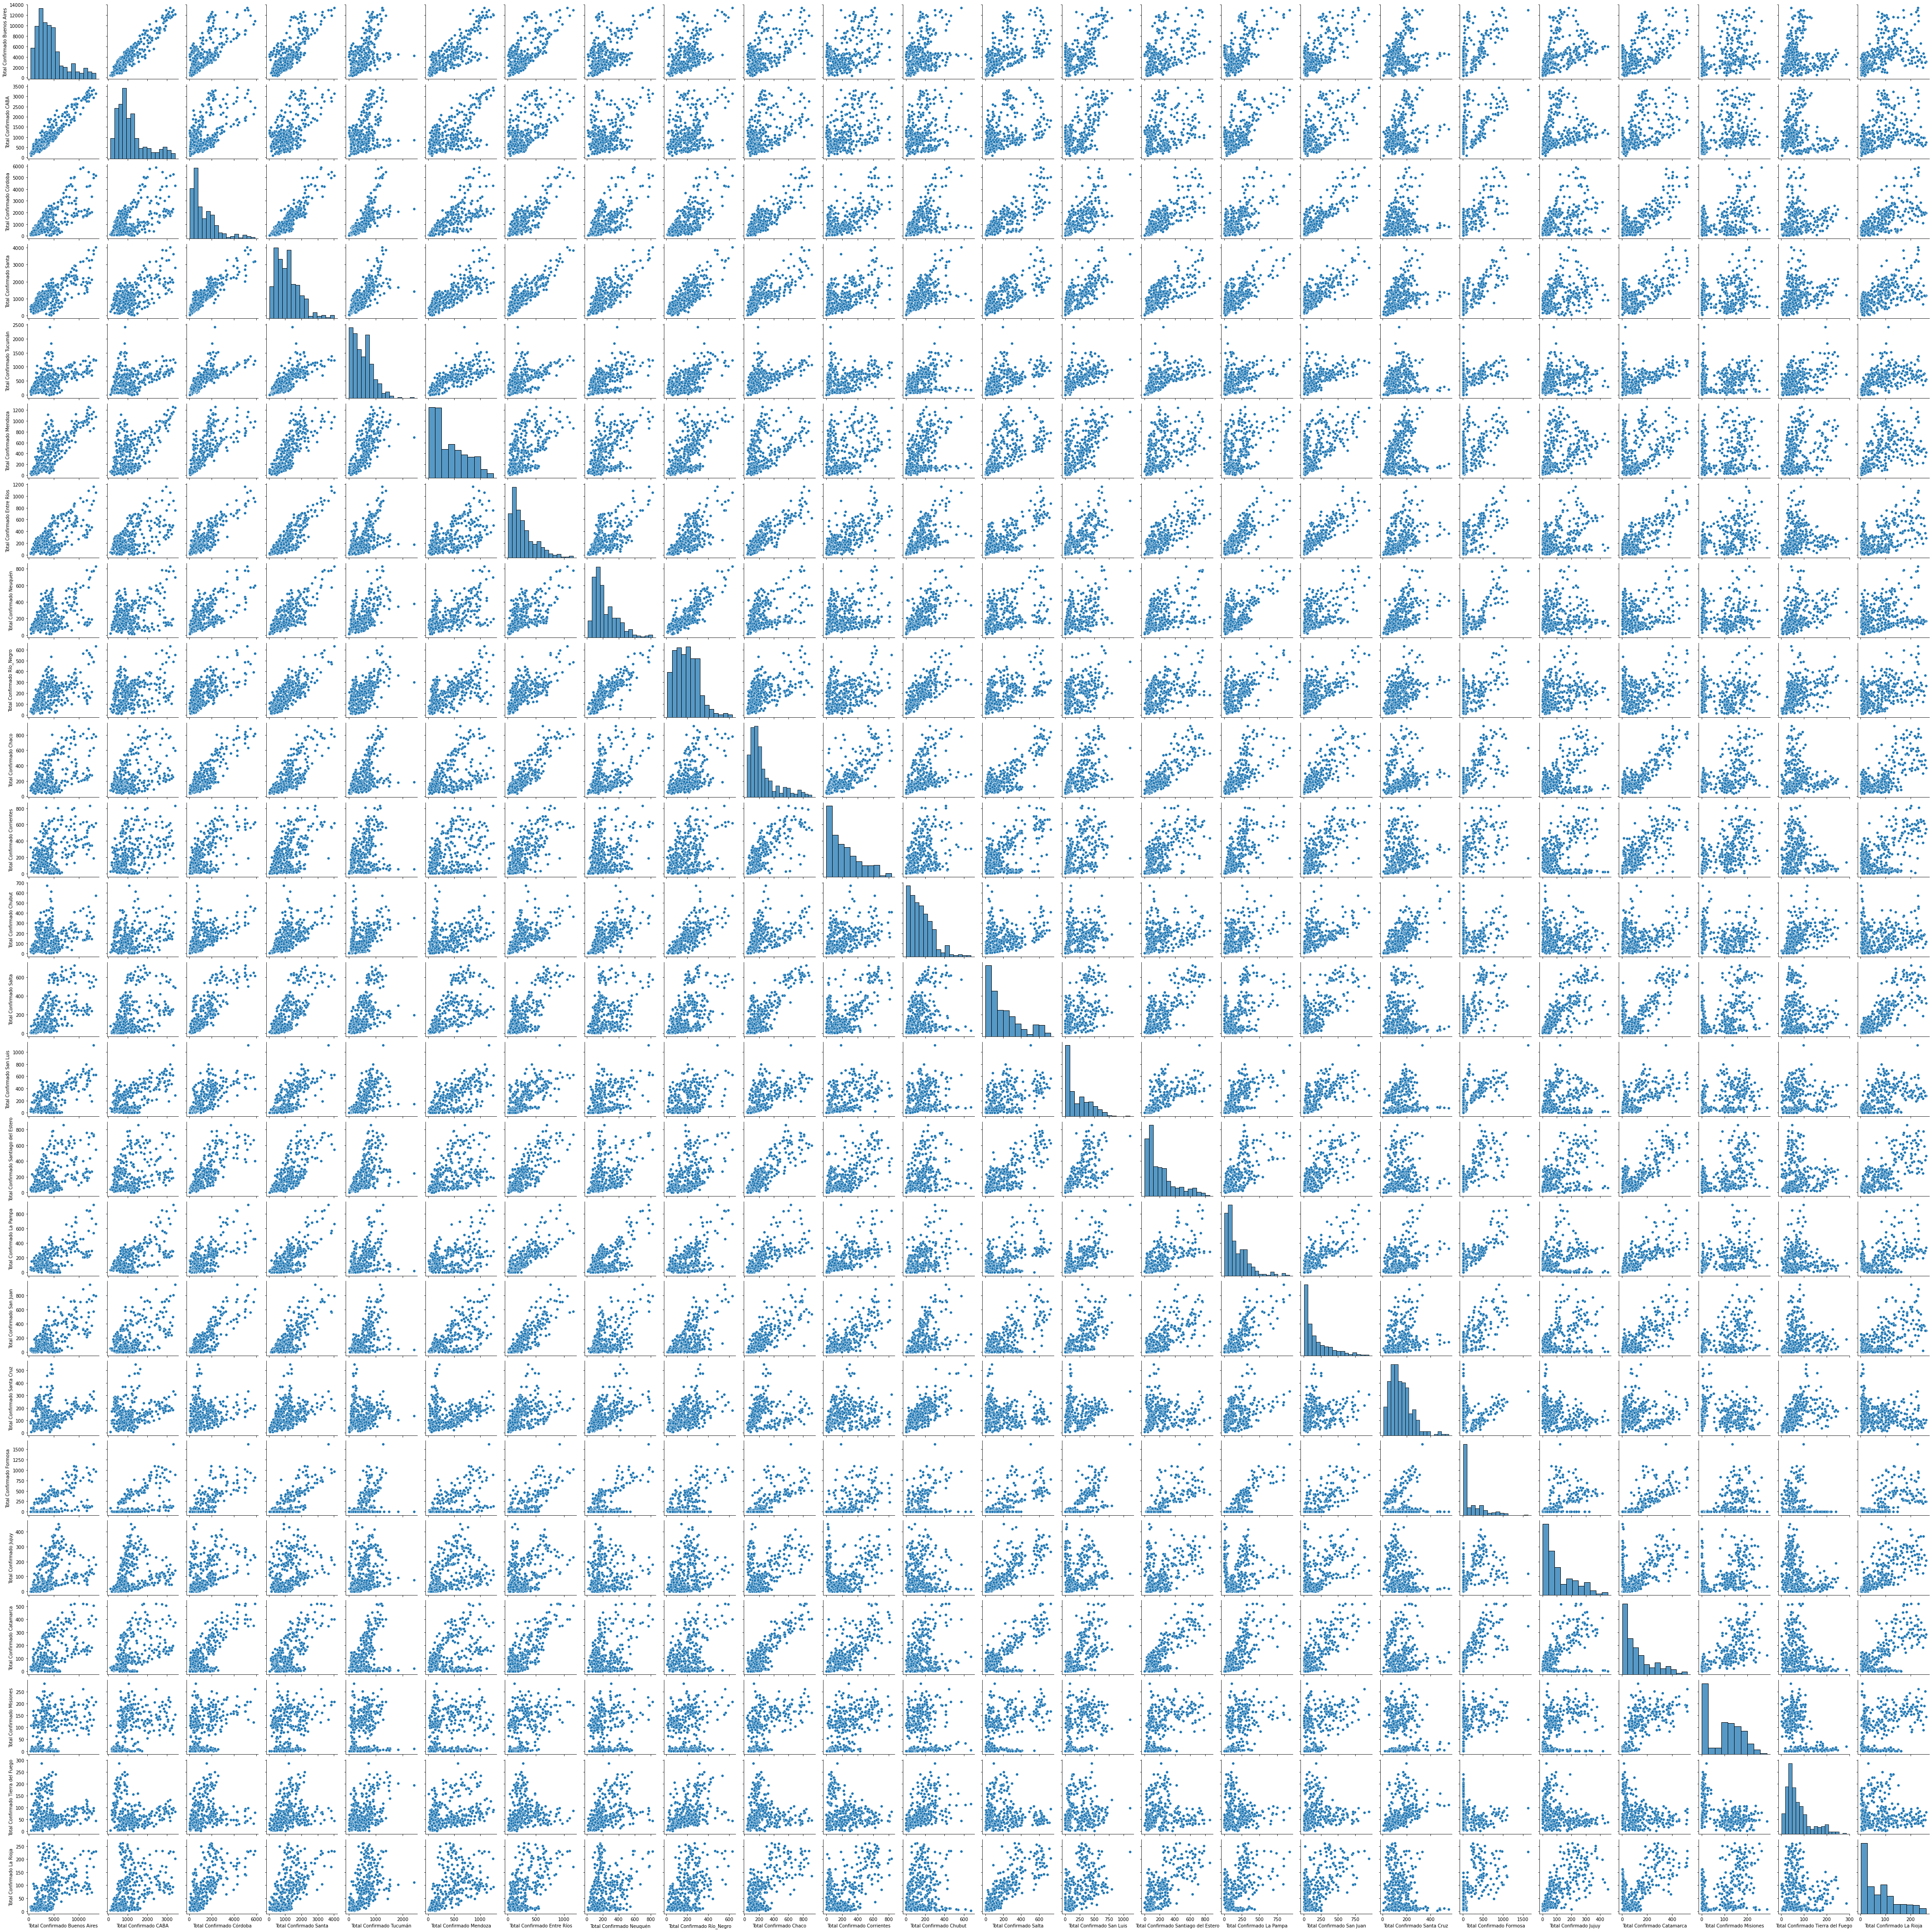

In [66]:
#here I create a correlation map of the provinces using the "seaborn" library
sns.pairplot(data = time3)
#(you can see that the same provinces )

## The most dangerous province

In [178]:
#here I group the columns "residence province name" and "fecha_fallecimiento" of the data frame and then I count the types of values of the column "fecha_fallecimiento"
dangerous = pd.DataFrame(finfection.groupby("residencia_provincia_nombre")["fecha_fallecimiento"].count())

#then i change the name of the "fecha_fallecimiento" column to "Fallecimiento"
dangerous.rename(columns = {"fecha_fallecimiento":"Fallecimiento"}, inplace = True)

#then I order the values in ascending order(of the column "Fallecimiento")
dangerous = dangerous.sort_values(by = "Fallecimiento",ascending = False)

#then y convert the index to column("residencia_provincia_nombre") and crete the index 
dangerous.reset_index(inplace = True)

#then i chage the name of "residencia_provincia_nombre" to "Provincia"
dangerous = dangerous.rename(columns = {'residencia_provincia_nombre':'Provincias'})

#here can see the results
dangerous.head()

Provincias  Fallecimiento
0  Buenos Aires          51826
1          CABA          10947
2      Santa Fe           7870
3       Córdoba           6198
4       Mendoza           4000

In [249]:
#here create a variable "Z" which is basically the basic information of the dataframe "finfection" when "asistencia_respiratoria_mecanica" is True (or in other words, "SI")
Z = finfection[finfection["asistencia_respiratoria_mecanica"] == "SI"]

#here I group the columns "residencia_provincia_nombre" and "asistencia_respiratoria_mecanica" of the data frame and then I count the types of values of the column "asistencia_respiratoria_mecanica"
dangerous2 = pd.DataFrame(Z.groupby("residencia_provincia_nombre")["asistencia_respiratoria_mecanica"].value_counts())

#then i change the name of the "asistencia_respiratoria_mecanica" column to "Asistencia Respiratoria"
dangerous2.rename(columns = {"asistencia_respiratoria_mecanica":"Asistencia Respiratoria"}, inplace = True)

#then I order the values in ascending order(of the column "Asistencia Respiratoria")
dangerous2 = dangerous2.sort_values(by = "Asistencia Respiratoria",ascending = False)

#then y convert the index to column("residencia_provincia_nombre") and crete the index 
dangerous2.reset_index(inplace = True)

#then i chage the name of "residencia_provincia_nombre" to "Provincia"
dangerous2 = dangerous2.rename(columns = {'residencia_provincia_nombre':'Provincias'})

#here delete an unnecessary column
dangerous2.drop("asistencia_respiratoria_mecanica", axis = 1, inplace = True)

#here can see the results
dangerous2.head()

Provincias  Asistencia Respiratoria
0  Buenos Aires                     7334
1          CABA                     3399
2      Santa Fe                     2012
3       Córdoba                     1855
4         Chaco                     1178

In [180]:
#here can the "df" dataframe 
df.head()

Provincias  Casos Confirmados
0  Buenos Aires            1755240
1          CABA             491540
2       Córdoba             474158
3      Santa Fe             413581
4       Tucumán             185448

In [181]:
#here I merge the "dangerous" and "dangerous2" dataframe using the column "Provincias" as the junction point
dangerous = pd.merge(dangerous , dangerous2 , on=["Provincias"])

#here I merge the "dangerous" and "df" dataframe using the column "Provincias" as the junction point
dangerous = pd.merge(dangerous , df, on = ["Provincias"])

#here i create the "Total de casos graves" column sum the values of the "Fallecimiento" and "Asistencia Respiratoria" columns
dangerous["Total de casos graves"] = dangerous["Fallecimiento"] + dangerous["Asistencia Respiratoria"]

#here i create the "Probabilidad de caso grave" column dividing the column the values of the "Total serious cases" by the  the values of the column  "Confirmed Cases" and multiplying them by 100
dangerous["Probabilidad de caso grave"] = dangerous["Total de casos graves"] / dangerous["Casos Confirmados"] * 100

#here we can see the results
dangerous

Provincias  Fallecimiento  Asistencia Respiratoria  \
0          Buenos Aires          51826                     7334   
1                  CABA          10947                     3399   
2              Santa Fe           7870                     2012   
3               Córdoba           6198                     1855   
4               Mendoza           4000                      793   
5               Tucumán           2635                      177   
6            Entre Ríos           2122                      404   
7             Río Negro           2087                      325   
8                 Chaco           2065                     1178   
9                 Salta           1953                      707   
10              Neuquén           1941                      688   
11                Jujuy           1350                      122   
12             San Luis           1245                      380   
13               Chubut           1192                      261   
14  Santiago del Estero           1083                       34   
15              Formosa           1048                      838   
16           Corrientes            974                      629   
17           Santa Cruz            913                      466   
18             San Juan            900                      120   
19             La Pampa            865                      361   
20             La Rioja            798                       13   
21             Misiones            614                      323   
22            Catamarca            492                       72   
23     Tierra del Fuego            471                      317   
24      SIN ESPECIFICAR             84                       22   

    Casos Confirmados  Total de casos graves  Probabilidad de caso grave  
0             1755240                  59160                    3.370479  
1              491540                  14346                    2.918582  
2              413581                   9882                    2.389375  
3              474158                   8053                    1.698379  
4              149779                   4793                    3.200048  
5              185448                   2812                    1.516328  
6               99459                   2526                    2.539740  
7               74012                   2412                    3.258931  
8               92714                   3243                    3.497854  
9               73458                   2660                    3.621117  
10              84341                   2629                    3.117108  
11              44487                   1472                    3.308832  
12              76111                   1625                    2.135040  
13              56659                   1453                    2.564465  
14              75294                   1117                    1.483518  
15              57519                   1886                    3.278917  
16              83701                   1603                    1.915150  
17              54087                   1379                    2.549596  
18              61700                   1020                    1.653160  
19              62634                   1226                    1.957403  
20              29629                    811                    2.737183  
21              31926                    937                    2.934912  
22              43893                    564                    1.284943  
23              27231                    788                    2.893761  
24               7409                    106                    1.430692

In [183]:
#here I sort the data frame using the column "Severe case probability" in ascending order
dangerous = dangerous.sort_values(by = "Probabilidad de caso grave",ascending = False)

#here we create a graph using the "plotly.graph_objs" and "plotly.offline"
#here we save the axis "x"(Provincias) and "y"(Probabilidad de caso grave) in the varible trace (using the "plotly.graph_objs")trace = go.Bar(
trace = go.Bar(
    x = dangerous["Provincias"],
    y = dangerous["Probabilidad de caso grave"])


#then i create a graph using the variable "trace"
iplot([trace])

## Correlation of the unemployment rate with the probability of infection 

In [47]:
#here i cretate a datafreme with the with the unemployment rate

#here y crate a dictionary with the data
DP_data = {"Provincias" : ['Buenos Aires', 'CABA', 'Santa Fe', 'Entre Ríos', 'Córdoba',
       'San Luis', 'Mendoza', 'Santa Cruz', 'La Pampa', 'Chaco',
       'Formosa', 'Salta', 'Neuquén', 'Chubut', 'Santiago del Estero',
       'Río Negro', 'Tucumán', 'San Juan', 'Catamarca', 'La Rioja',
       'Tierra del Fuego', 'Corrientes', 'Jujuy', 'Misiones'],
           "Desempleo_UltimoTrimestre_2020" : [14.1, 10.1, 7.8, 7.8, 11.0, 5.0, 10.6, 6.0, 11.0, 8.3,
                        4.0, 8.6, 8.4, 5.0, 11.7, 7.2, 11.0, 6.7, 6.8, 4.3, 12.8, 6.7, 4.0, 3.9]}
#then i convert this dictionary to dataframe
DP_data = pd.DataFrame(DP_data)  

#here we can see the result
DP_data

Provincias  Desempleo_UltimoTrimestre_2020
0          Buenos Aires                            14.1
1                  CABA                            10.1
2              Santa Fe                             7.8
3            Entre Ríos                             7.8
4               Córdoba                            11.0
5              San Luis                             5.0
6               Mendoza                            10.6
7            Santa Cruz                             6.0
8              La Pampa                            11.0
9                 Chaco                             8.3
10              Formosa                             4.0
11                Salta                             8.6
12              Neuquén                             8.4
13               Chubut                             5.0
14  Santiago del Estero                            11.7
15            Río Negro                             7.2
16              Tucumán                            11.0
17             San Juan                             6.7
18            Catamarca                             6.8
19             La Rioja                             4.3
20     Tierra del Fuego                            12.8
21           Corrientes                             6.7
22                Jujuy                             4.0
23             Misiones                             3.9

In [48]:
#here I merge the "DP_data" and "df" dataframe using the column "Provincias" as the junction point
DP_data = pd.merge(DP_data , df, on = ["Provincias"])
DP_data

Provincias  Desempleo_UltimoTrimestre_2020  Casos Confirmados
0          Buenos Aires                            14.1            1755240
1                  CABA                            10.1             491540
2              Santa Fe                             7.8             413581
3            Entre Ríos                             7.8              99459
4               Córdoba                            11.0             474158
5              San Luis                             5.0              76111
6               Mendoza                            10.6             149779
7            Santa Cruz                             6.0              54087
8              La Pampa                            11.0              62634
9                 Chaco                             8.3              92714
10              Formosa                             4.0              57519
11                Salta                             8.6              73458
12              Neuquén                             8.4              84341
13               Chubut                             5.0              56659
14  Santiago del Estero                            11.7              75294
15            Río Negro                             7.2              74012
16              Tucumán                            11.0             185448
17             San Juan                             6.7              61700
18            Catamarca                             6.8              43893
19             La Rioja                             4.3              29629
20     Tierra del Fuego                            12.8              27231
21           Corrientes                             6.7              83701
22                Jujuy                             4.0              44487
23             Misiones                             3.9              31926

In [49]:
#here i male a graph with the unemployment rate and the total cases 

#then I sort the "DP_data" data frame by the "Casos Confirmados" in ascending order
DP_data = DP_data.sort_values(by = "Casos Confirmados",ascending = False)

#here i make the varible "fig" using the "plotly.express" library for make the graph, in the "x" axis i put the name of the provinces(DP_data["Provincias"]) using the dataframe "DP_data" and in the "y" axis i put the unemployment (DP_data["Desempleo_UltimoTrimestre_2020"]) using the dataframe "DP_data"
#then i set the color and the name of this graph(color = px.Constant("Desempleo"))
fig = px.line(x = DP_data["Provincias"], y = DP_data["Desempleo_UltimoTrimestre_2020"], color = px.Constant("Desempleo porcentual"),
              #then y set the name of the "x" axis and the "y" axis
              labels = dict(x = "Provincias", y = "Cantidad", color = "Casos y Desempleo"))

#then I add another graph with the total cases of each province
fig.add_bar(x = DP_data["Provincias"], y = DP_data["Casos Confirmados"], name = "Casos")

#here we can see the result
fig.show()